In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Question 1

In [2]:
iris = pd.read_csv("./data/iris.csv")
iris.sample(10, random_state=0)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
114,5.8,2.8,5.1,2.4,Iris-virginica
62,6.0,2.2,4.0,1.0,Iris-versicolor
33,5.5,4.2,1.4,0.2,Iris-setosa
107,7.3,2.9,6.3,1.8,Iris-virginica
7,5.0,3.4,1.5,NaN,Iris-setosa
100,6.3,3.3,6.0,2.5,Iris-virginica
40,5.0,3.5,1.3,0.3,Iris-setosa
86,6.7,3.1,4.7,1.5,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor
71,6.1,2.8,4.0,1.3,Iris-versicolor


In [3]:
display(iris.shape)
iris['class'].value_counts()

(150, 5)

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

Iris dataset contains 150 instances and 5 attributes. There are 5 different class labels. But should be 3. Need to replace "versicolor" to "Iris-versicolor" and "Iris-setossa" to "setosa". 

In [4]:
iris.loc[iris['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris.loc[iris['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

In [5]:
iris['class'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64

In [6]:
iris.to_csv('./data/iris_clean.csv', index=False)

In [7]:
iris.head(10)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa


## Question 2

In [8]:
def check_csv(filename):
    """
    check that every instance has the same number of fields (separated by commas)
    """
    f = open('./data/' + filename, 'r')
    n_attributes_in_instances = [len(line.split(',')) for line in f.readlines()[1:]]
    f.close()
    return len(set(n_attributes_in_instances)) == 1
    
check_csv("iris.csv")

True

In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     145 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


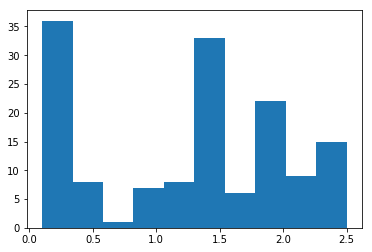

In [10]:
f = open('./data/iris.csv')
petal_widths = [line.split(',')[3] for line in f.readlines()[1:]]
petal_widths = [float(pw) for pw in petal_widths if pw != 'NA']
f.close()
plt.hist(np.array(petal_widths))
plt.show()

Why mean imputation is bad? The distribution of petal widths has several distict peaks, and the mean value is far from being the most frequent.

## Question 3

In [11]:
iris.head(10)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa


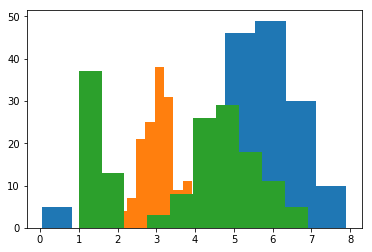

In [12]:
plt.hist(iris.sepal_length_cm)
plt.hist(iris.sepal_width_cm)
plt.hist(iris.petal_length_cm)
plt.show()

Is this a blue outlier near zero? Are they recorded in meters instead of centimeters?

In [20]:
display(iris.loc[iris.sepal_length_cm < 1, 'sepal_length_cm'])
iris.loc[iris.sepal_length_cm < 1, 'sepal_length_cm'] = iris.loc[iris.sepal_length_cm < 1, 'sepal_length_cm']*100
iris.to_csv('./data/iris_clean.csv', index=False)

Series([], Name: sepal_length_cm, dtype: float64)

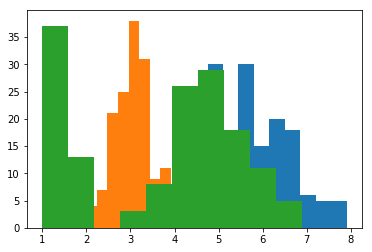

In [21]:
plt.hist(iris.sepal_length_cm)
plt.hist(iris.sepal_width_cm)
plt.hist(iris.petal_length_cm)
plt.show()

## Question 4

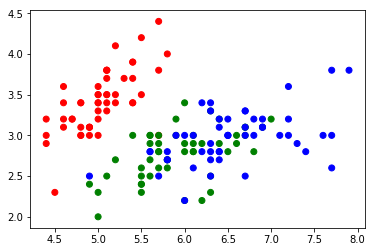

In [26]:
colours = 50*["red"]+50*["green"]+50*["blue"]

plt.scatter(iris.sepal_length_cm, iris.sepal_width_cm, c=colours)
plt.show()